# Supriyo Barik

### Working on Breast Cancer

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# data
cancer = load_breast_cancer()

In [3]:
# Data splitings (X and y)
# X--> data without target column
# y--> only target column 
X = cancer['data']
y = cancer['target']

In [4]:
# printing target names
print(cancer.target_names)

['malignant' 'benign']


In [5]:
# columns names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# dimention of the data
print(cancer.data.shape)

(569, 30)


In [7]:
# target column distribution
pd.value_counts(pd.DataFrame(y).values.flatten())

1    357
0    212
dtype: int64

In [8]:
# train test split
X_train , X_test , y_train, y_test = train_test_split(X , y , train_size = 0.7 , random_state = 42)

In [11]:
# General model defination 
def modeller(model , X_train , y_train , X_test , y_test):
    m = model
    m.fit(X_train , y_train)
    y_pred = m.predict(X_test)
    y_pred = model.predict(X_test)
    print('Accuracy on the training set: {:.3f}'.format(m.score(X_train,y_train)))
    print('Accuracy on the test set: {:.3f}'.format(m.score(X_test,y_test)))
    mislabel = np.sum((y_test!=y_pred))
    print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))
    print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap = 'Blues', fmt = 'd')
    plt.show()
    print("The classification report is as follows...\n")
    print(classification_report(y_test, y_pred, target_names=cancer.target_names))
    target_probabilities = m.predict_proba(X_test)[:,1]
    print(roc_auc_score(y_test, target_probabilities))

DecisionTreeClassifier()
Accuracy on the training set: 1.000
Accuracy on the test set: 0.936
Total number of mislabelled data points from 171 test samples is 11
Accuracy of test set= 93.56725146198829


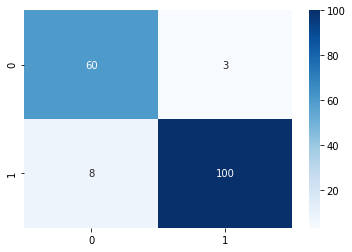

The classification report is as follows...

              precision    recall  f1-score   support

   malignant       0.88      0.95      0.92        63
      benign       0.97      0.93      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

0.9391534391534391
**************************************************
RandomForestClassifier()
Accuracy on the training set: 1.000
Accuracy on the test set: 0.971
Total number of mislabelled data points from 171 test samples is 5
Accuracy of test set= 97.07602339181285


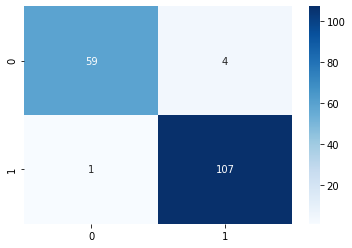

The classification report is as follows...

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

0.9961052322163433
**************************************************
GaussianNB()
Accuracy on the training set: 0.940
Accuracy on the test set: 0.942
Total number of mislabelled data points from 171 test samples is 10
Accuracy of test set= 94.15204678362574


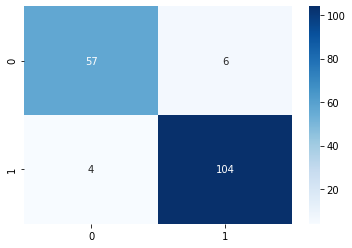

The classification report is as follows...

              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        63
      benign       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

0.9922104644326867
**************************************************
LogisticRegression()
Accuracy on the training set: 0.937
Accuracy on the test set: 0.971
Total number of mislabelled data points from 171 test samples is 5
Accuracy of test set= 97.07602339181285


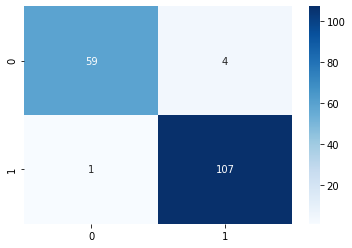

The classification report is as follows...

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

0.9969135802469136
**************************************************


In [12]:
# Implement the following Classification Models on the Breast Cancer Dataset
# 1. Decision Tree Classifier
# 2. Random Forest Classifier
# 3. Naive Bayes Classifier
# 4. Logistic Regression
# We will check the best model
models = [DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), LogisticRegression()]
for model in models:
    print(model)
    modeller(model , X_train , y_train , X_test , y_test)
    print("*"*50)

# Best Model: RandomForestClassifier and LogisticRegression

### Both these models show same accuracy, roc_auc_score, f1_score, and confusion_matrix value

# Done